In [1]:
### Previous step: Align assembly genomes
##extract and modify the name of fasta sequences
#seqkit sort -l -r -i S1_hifi.asm.bp.p_ctg.fa|seqkit head -n 26 |seqkit replace -p .+ -r 'S1_{nr}' -o S1_min1M_rename.fasta
## minimap2 -t 128 -x asm5 /scratch/pawsey0399/bguo1/0.assembly/01.hifi_assembly/S2_HIFI_RESULT/S2_hifi.asm.bp.p_ctg.fa /scratch/pawsey0399/bguo1/0.assembly/01.hifi_assembly/S1_HIFI_RESULT/S1_hifi.asm.bp.p_ctg.fa >S1_TO_S2.paf

# Load necessary libraries
library(pafr)      # For handling PAF (Pairwise mApping Format) files
library(patchwork) # For creating composite plots
library(tidyverse) # For data manipulation and visualization

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the PAF file into a data frame
df <- read_paf("minimap_aln.paf")

# Display the first few rows of the data frame
df %>% as.data.frame() %>% head()

,qname,qlen,qstart,qend,strand,tname,tlen,tstart,tend,nmatch,⋯,AS,nn,tp,cm,s1,s2,de,zd,rl,cg
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,H2_ch1,45755433,0,18148746,+,H1_ch1,46446282,0,18379680,18142481,⋯,17894153,0,P,1752695,17621945,66860,0.0000,1,2320238,572435M1I2449D3540906M7178D2656025M10617D3638444M2I549064M162404D2424412M52788D26234M1312D4725369M4D781M4I1755M1I304M28D2352M1I445M22I212M7I70M1I28M1D51M1D49M2D299M1I37M1I134M5540I24M1D34M1I318M1D53M1D195M25I88M9D33M8I18M1I35M1D45M9I92M3D170M6D127M3D66M2I542M1I21M1I320M3D131M1D73M2D70M1D80M39D191M1I21M3I58M2I181M26D88M5I34M365I76M5I36M63D110M
2,H2_ch1,45755433,28237577,45755433,+,H1_ch1,46446282,28922022,46446282,17517851,⋯,17511212,0,P,1702369,17115960,66860,0.0000,2,2320238,442863M1I6203M1D2864748M6405D10998884M1I3205156M
3,H2_ch1,45755433,18154173,28237548,+,H1_ch1,46446282,18539392,28765217,10083347,⋯,9940157,0,P,937690,9427722,66860,0.0000,3,2320238,2965897M13192D5873594M7292D1239591M1I1498M1D1930M1D64M15D791M121950D9M
4,H2_ch2,34236763,14570880,14761637,+,H1_ch2,32424507,14849254,14956237,80490,⋯,-79659,0,P,4812,48436,15775,0.0250,3,1817180,36M1I87M2I171M12I273M1D45M1I1067M1D886M4I1008M6941D745M3I130M8D229M33D3M10I122M1I233M6I533M8I810M1D251M1I338M1I490M5318I142M1D382M670I294M5786D149M1D234M2I41M10I127M1I56M6I1121M6I1429M5D33M1D337M2I339M1I82M4I441M1D176M23050I2244M2I368M1I38M1D1145M1I318M1D389M20D453M2I22M6D328M3I313M3I912M16I63M1D45M2D228M8I670M1D497M1D1066M1D813M1I1015M2D955M2D79M53D220M1I30M2D107M1D241M11I647M1I35M1D90M1D290M1I123M3596D291M1D48M3I209M2I178M1D187M1I370M4I322M1D49M1I3124M22I350M9I65M1I2566M985D267M3I44M5516D592M1D725M49D7M6D316M1D186M2I52M12I19M1D93M1D54M1I218M4I173M3I574M4D244M26512I14M11I329M1I665M2D121M1D357M1D34M1D949M1D278M1I221M1D47M2I160M2I134M1I43M2D359M1D55M7D285M1I303M3D53M1D214M1366I1401M2D252M1D63M1D562M17D1007M32D63M1I46M1D753M1D815M1I819M15D576M1D78M12I719M1I282M1D201M17I468M18D31M1D150M165I214M2D39M1D256M1D1362M1472I383M1D588M13D530M15D814M2D1028M1I225M1D1392M1I25M1D8M2D48M10D277M6I48M1I139M1I73M2D1294M15534I805M1I517M1D319M45I104M12502I340M24I878M1D1046M1I7M1I1358M1D631M9D254M1I1152M2D386M1D53M1I804M1D755M1I51M18I151M1D45M13D301M2I252M1D73M2I21M1I167M3D148M12I512M2D162M3D1450M1I117M4I55M39I964M2D37M2D844M1I626M1I306M1I124M1I169M1I1047M1D781M1204D137M15I130M2I171M171D220M9521I593M1D35M11570I238M5I218M273I344M1I554M1D325M1D71M1D226M1D401M2D298M5I334M1I634M1D56M
5,H2_ch2,34236763,14229372,14293498,+,H1_ch2,32424507,14558452,14623939,57478,⋯,25221,0,P,3528,35512,15775,0.0264,3,1817180,18M1I127M3039I229M5I21M7I434M4I190M1D48M1I20M3D36M1D366M10I5M2D48M1D426M7I511M10D57M1I25M1D676M6D279M1I639M18I2614M20I1296M6D607M1D832M1D268M1D187M5D470M5D368M2D355M1I717M4I128M1I168M3D301M6D240M1D411M1I1569M3I255M6D95M1I683M1I509M1I565M23I321M1I1415M17I304M1022D628M3650D182M1D444M3D102M1D2123M1D26M1488D92M1D964M2D147M1D158M1I245M1D686M1D215M2I63M2D45M1I132M1I138M177D27M1D25M1D36M1D156M1D636M4D739M18I131M1D433M37I263M1I105M29I144M1D135M1I316M1I95M1I112M11I753M1D344M877I67M690I85M2I348M11D278M1I178M1D616M15I114M1I43M2D808M1D321M1D472M1I587M1D311M1D217M1D25M1I761M1D794M2D111M1D1130M1D1561M2I245M2I54M1D233M1I359M1D110M1I47M1D411M3I134M9D235M1D1616M6D766M1D122M1D487M1D915M1D71M9D45M1D24M3D113M8I3M1I93M9I64M4D32M3I74M141I108M3D155M6I145M1I849M1I118M1D88M26I354M24I464M1D29M4I227M1I84M1I480M1I102M1I222M14I14M1D559M1D316M1I156M1I123M31I1899M42I449M1D229M30I1090M1I365M9I137M1I47M1D260M1I391M1D329M2D156M13I154M4D253M1I15M5D144M42D2352M56D782M2I87M1I206M1I189M
6,H2_ch2,34236763,26943149,27004165,+,H1_ch2,32424507,25801900,25878793,57622,⋯,16723,0,P,3693,34344,25492,0.0234,3,1817180,182M1I98M88D7M2D430M1I267M1D82M1I6M3D55M3D157M1I865M1D223M15I284M1I611M1I177M1I141M1D41M3I71M14I143M5I143M8D193M1I400M7I73M14I227M2D389M4779D94M3339D229M1I202M1D182M8I144M7D64M4I134M2D52M2I228M2I33M2D387M3I39M1D29M10D150M1D27M2D98M3D5M3D154M24D104M65I1031M1I284M2D536M1D305M1D389M2D521M1I239M1I247M2I1561M1D517M20

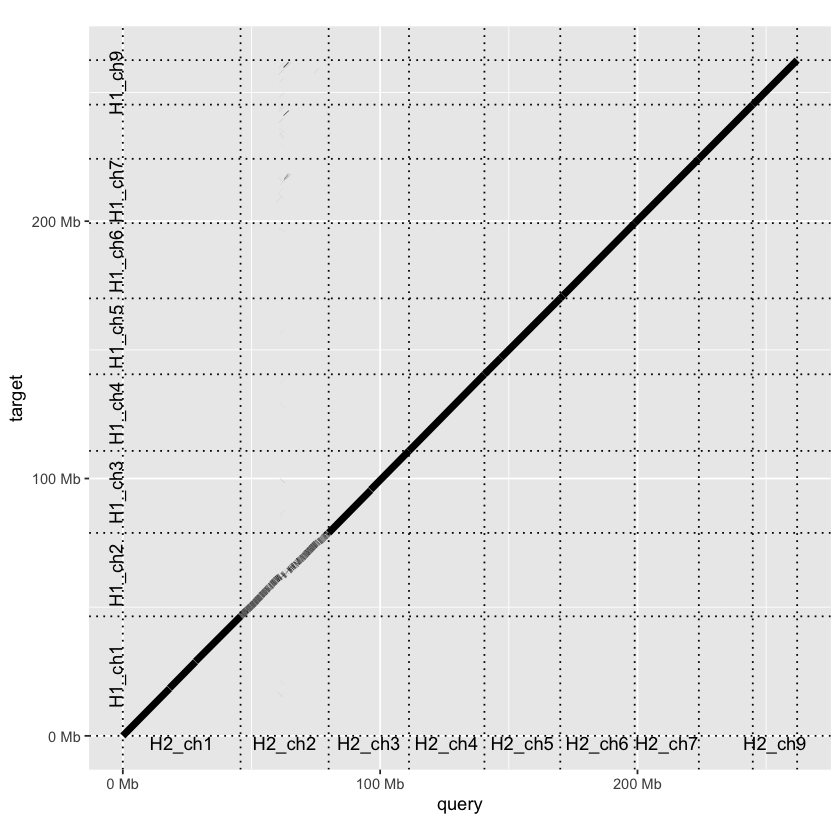

In [17]:
# Create a dotplot visualization from the PAF data
dotplot(df, order_by='provided',
        ordering= list(c("H2_ch1","H2_ch2","H2_ch3","H2_ch4","H2_ch5","H2_ch6","H2_ch7","H2_ch8","H2_ch9"),
        c("H1_ch1","H1_ch2","H1_ch3","H1_ch4","H1_ch5","H1_ch6","H1_ch7","H1_ch8","H1_ch9")),
        label_seqs = TRUE)

In [19]:
install.packages("gridExtra")

Installing package into ‘/Users/yongjia/Library/R/x86_64/4.2/library’
(as ‘lib’ is unspecified)



In [20]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Warning message:
“Dropping data from sequences absent from ordering:
 H2_ch2,H2_ch3,H2_ch4,H2_ch5,H2_ch6,H2_ch7,H2_ch8,H2_ch9”
Warning message:
“Dropping data from sequences absent from ordering:
 H1_ch2,H1_ch8,H1_ch9,H1_ch7,H1_ch3,H1_ch6,H1_ch4,H1_ch5”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Dropping data from sequences absent from ordering:
 H2_ch1,H2_ch3,H2_ch4,H2_ch5,H2_ch6,H2_ch7,H2_ch8,H2_ch9”
Warning message:
“Dropping data from sequences absent from ordering:
 H1_ch1,H1_ch8,H1_ch9,H1_ch7,H1_ch3,H1_ch6,H1_ch4,H1_ch5”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Dropping data from sequences absent from ordering:
 H2_ch1,H2_ch2,H2_ch4,H2_ch

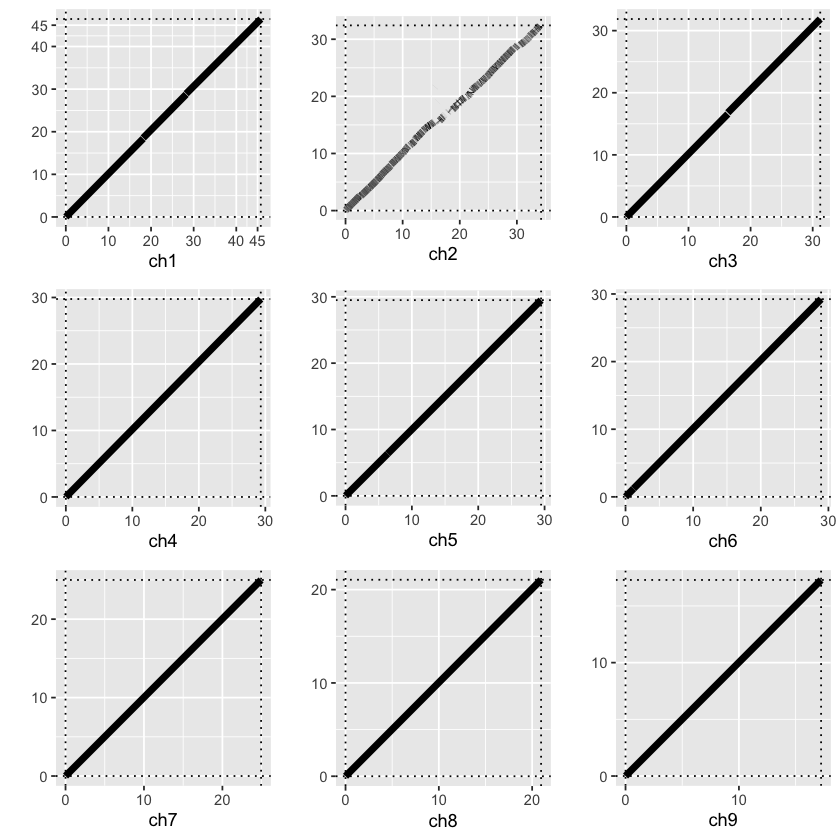

In [57]:
# Create an empty list to store the ggplot objects
plots_list <- list()

# Loop from 1 to 9
for (i in 1:9) {
  # Create ggplot for each iteration
    CHR <- paste0("ch", i)
    CHR1 <- paste0("H1_ch", i)
    CHR2 <- paste0("H2_ch", i)
    plot <- dotplot(df, order_by='provided',
            ordering= list(c(CHR2),
            c(CHR1)),
            label_seqs = FALSE) +
    scale_x_continuous(breaks = c(0, 10000000, 20000000, 30000000, 40000000, 45000000), labels = c("0", "10", "20", "30", "40", "45"))+
    scale_y_continuous(breaks = c(0, 10000000, 20000000, 30000000, 40000000, 45000000), labels = c("0", "10", "20", "30", "40", "45"))+
    labs(x = CHR) +
    labs(y = "")
    
  # Name the ggplot object
  plot_name <- paste0("P", i)
  
  # Store the ggplot object in the list
  plots_list[[plot_name]] <- plot
}

# Arrange plots in a 3x3 grid
final_plot <- grid.arrange(grobs = plots_list, nrow = 3, ncol = 3)
ggsave("final_plot.pdf", final_plot, width = 6, height = 6)

Warning message:
“Dropping data from sequences absent from ordering:
 H2_ch1,H2_ch3,H2_ch4,H2_ch5,H2_ch6,H2_ch7,H2_ch8,H2_ch9”
Warning message:
“Dropping data from sequences absent from ordering:
 H1_ch1,H1_ch8,H1_ch9,H1_ch7,H1_ch3,H1_ch6,H1_ch4,H1_ch5”


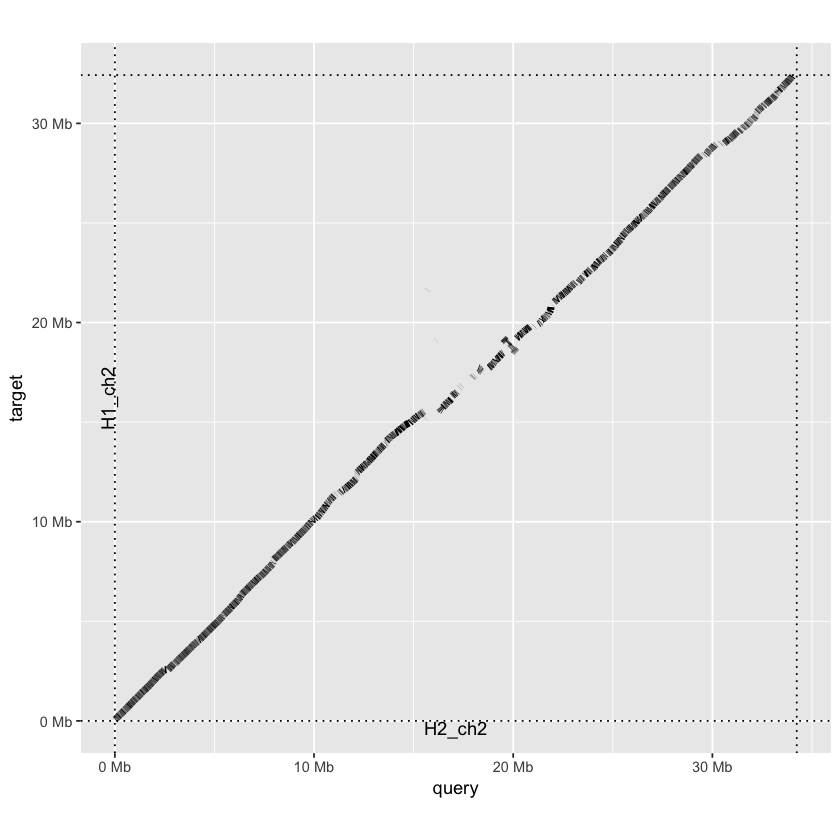

In [18]:
# Create a dotplot visualization from the PAF data
dotplot(df, order_by='provided',
        ordering= list(c("H2_ch2"),
        c("H1_ch2")),
        label_seqs = TRUE)

In [58]:
# Create a synteny plot for a specific chromosome pair
# (Adjust 'q_chrom' and 't_chrom' to match the desired chromosomes)
plot2 <- plot_synteny(df, q_chrom = "H2_ch2", t_chrom = "H1_ch2", centre = TRUE)
ggsave("synteny_chr2_plot.pdf", plot2, width = 18, height = 6)

In [43]:
help(plot_synteny)

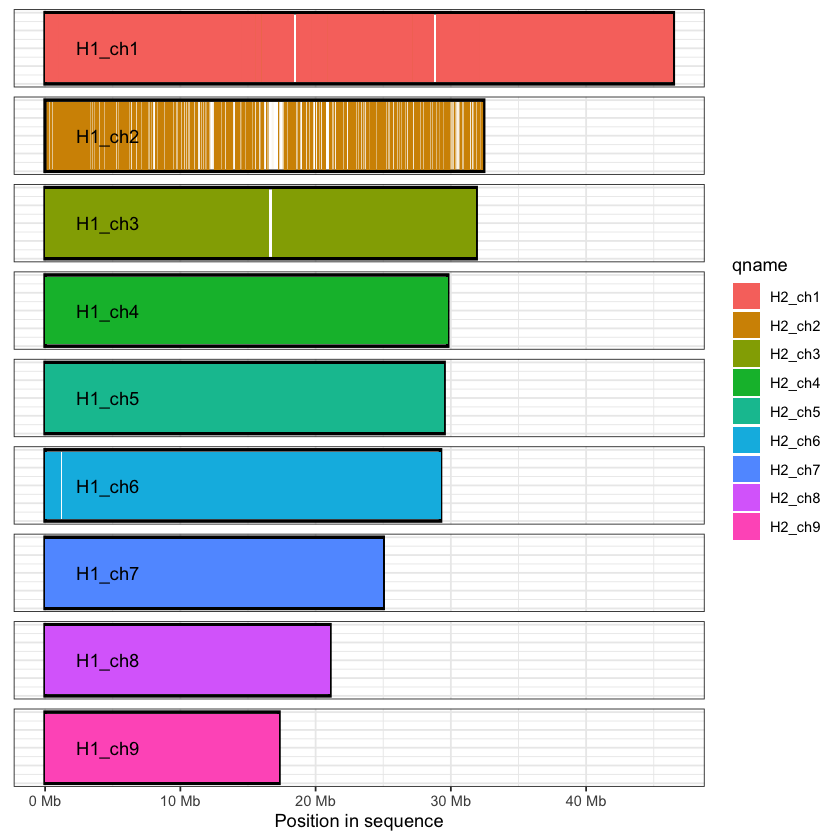

In [14]:
# Create a coverage plot, filling based on the query sequences
plot_coverage(df, fill = "qname")